In [1]:
import os
os.environ['R_HOME'] = '/home/qukun/xuhao/miniconda3/envs/giotto/lib/R' 
import shutil
shutil.which("R")

'/home/qukun/xuhao/miniconda3/envs/palantir/bin/R'

In [2]:
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3
import sys
sys.path.append("/home/qukun/xuhao/workspace/Utils")
import sc_plot
from sc_process import grouped_obs_mean
from sc_plot import plot_proportion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cx_pbmc_immune_b_raw = sc.read_h5ad('../scripts/CX_20211030/cx_pbmc_immune_results/cx_pbmc_immune_b_palantir.h5ad')
start_cell_b = cx_pbmc_immune_b_raw.obs_names[cx_pbmc_immune_b_raw.obsm['X_phate'][:,0].argmax()]

In [6]:
pr_res_b = sc.external.tl.palantir_results(cx_pbmc_immune_b_raw, start_cell_b, ms_data='X_phate',num_waypoints=500, n_jobs=4, scale_components=True, use_early_cell_as_start=False, max_iterations=25)

Palantir computing waypoints..
Sampling and flocking waypoints...
Time for determining waypoints: 0.01801240841547648 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


Time for shortest paths: 3.502369777361552 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9999
Correlation at iteration 2: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...


/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:379: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  cells = [pseudotime[i].idxmax() for i in nx.connected_components(graph)]
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:447: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ent = ent.append(pd.Series(0, index=terminal_states))
/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/palantir/core.py:450: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  branch_probs = branch_probs.append(bp.loc[:, branch_probs.columns])


Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [8]:
data = cx_pbmc_immune_b_raw.obs[['pseudotime','tissue_cli']]

In [13]:
data.to_csv('source_data/fig4h_source_data.csv')

In [9]:
bins = 10
data_bins = []
for i in range(bins):
    width = 1/bins
    data1 = data[(data.pseudotime < (i+1)*width)&(data.pseudotime > i*width)]['tissue_cli'].value_counts().loc[['PBMC_HC','PBMC_SjS','CX_HC','CX_SjS']]
    data1 = data1/data1.sum()
    data_bins.append(data1.tolist())
data_bins = np.array(data_bins)

In [10]:
cx_pbmc_immune_b_raw.obs['pseudotime'] = pr_res_b.pseudotime

findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


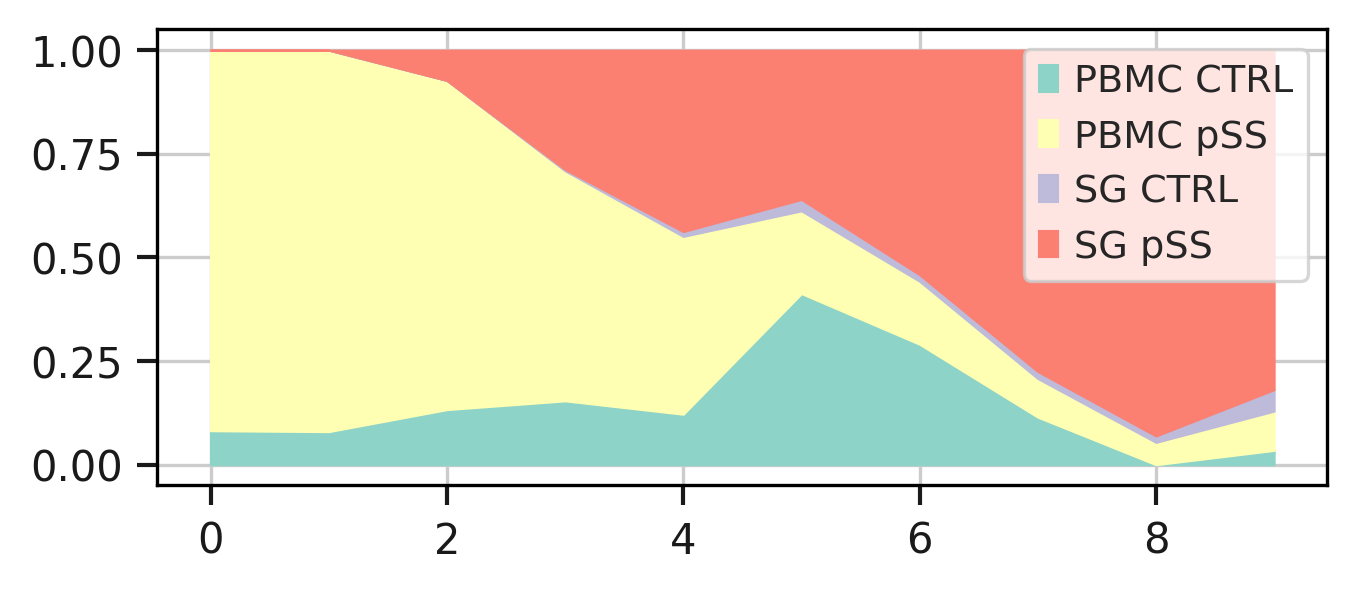

In [11]:
fig,ax=plt.subplots(figsize=(5,2))
colors = sns.color_palette('Set3',n_colors=4)
ax.fill_between(range(bins), 0, data_bins[:,0], lw=.5,label='PBMC CTRL',color=colors[0])
ax.fill_between(range(bins), data_bins[:,0],data_bins[:,0]+data_bins[:,1], lw=.5,label='PBMC pSS',color=colors[1])
ax.fill_between(range(bins), data_bins[:,0]+data_bins[:,1],data_bins[:,0]+data_bins[:,1]+data_bins[:,2], lw=.5,label='SG CTRL',color=colors[2])
ax.fill_between(range(bins), data_bins[:,0]+data_bins[:,1]+data_bins[:,2],1, lw=.5,label='SG pSS',color=colors[3])
plt.legend(bbox_to_anchor=(1,1))

In [23]:
pd.concat([cx_pbmc_immune_b_raw.obs[['celltype_minor','pseudotime','cli_state','tissue']],pd.DataFrame(cx_pbmc_immune_b_raw.obsm['X_phate'],index=cx_pbmc_immune_b_raw.obs_names,columns=['phate_1','phate_2'])],axis=1).to_csv('source_data/fig4d2g_source_data.csv')

In [20]:
cx_pbmc_immune_b_raw

AnnData object with n_obs × n_vars = 8460 × 21695
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'ident', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'sample', 'RNA_snn_res.2', 'seurat_clusters', 'celltype_submarkers', 'celltype_major', 'celltype_minor', 'RNA_snn_res.1', 'RNA_snn_res.1.5', 'tissue', 'RNA_snn_res.0.5', 'integrated_snn_res.2', 'integrated_snn_res.1.5', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.2.5', 'integrated_snn_res.3', 'cli_state', 'tissue_cli', 'major_celltype', 'pseudotime'
    var: 'features'
    uns: 'celltype_minor_colors', 'cli_state_colors', 'rank_genes_groups', 'sample_colors', 'seurat_clusters_colors', 'tissue_colors'
    obsm: 'X_pca', 'X_phate', 'X_umap'

In [21]:
cx_pbmc_immune_b_raw.obs[['celltype_minor','pseudotime','cli_state','tissue']]

celltype_minor  pseudotime cli_state tissue
TTTCATGGTCATCGGC-1_1_1        B_BANK1    0.726177       SjS     CX
TCACATTCACGTGTGC-1_1_1        B_BANK1    0.714702       SjS     CX
TCATCCGGTACAGTCT-1_1_1        B_BANK1    0.692251       SjS     CX
ACCGTTCCATTGTAGC-1_1_1        B_BANK1    0.725453       SjS     CX
TGCGATAGTTCAGCTA-1_1_1        B_BANK1    0.731190       SjS     CX
...                               ...         ...       ...    ...
CGCATAAAGTCGCTAT-1_8_2       B_VPREB3    0.552797        HC   PBMC
GACAGCCAGGTAAACT-1_8_2        B_BANK1    0.744656        HC   PBMC
TCTAACTGTAGCTAAA-1_8_2       B_VPREB3    0.609575        HC   PBMC
TTGGGATGTTCTCCAC-1_8_2         B_CD83    0.744826        HC   PBMC
TTCCGTGTCCATCAGA-1_8_2         B_CD83    0.967339        HC   PBMC

[8460 rows x 4 columns]

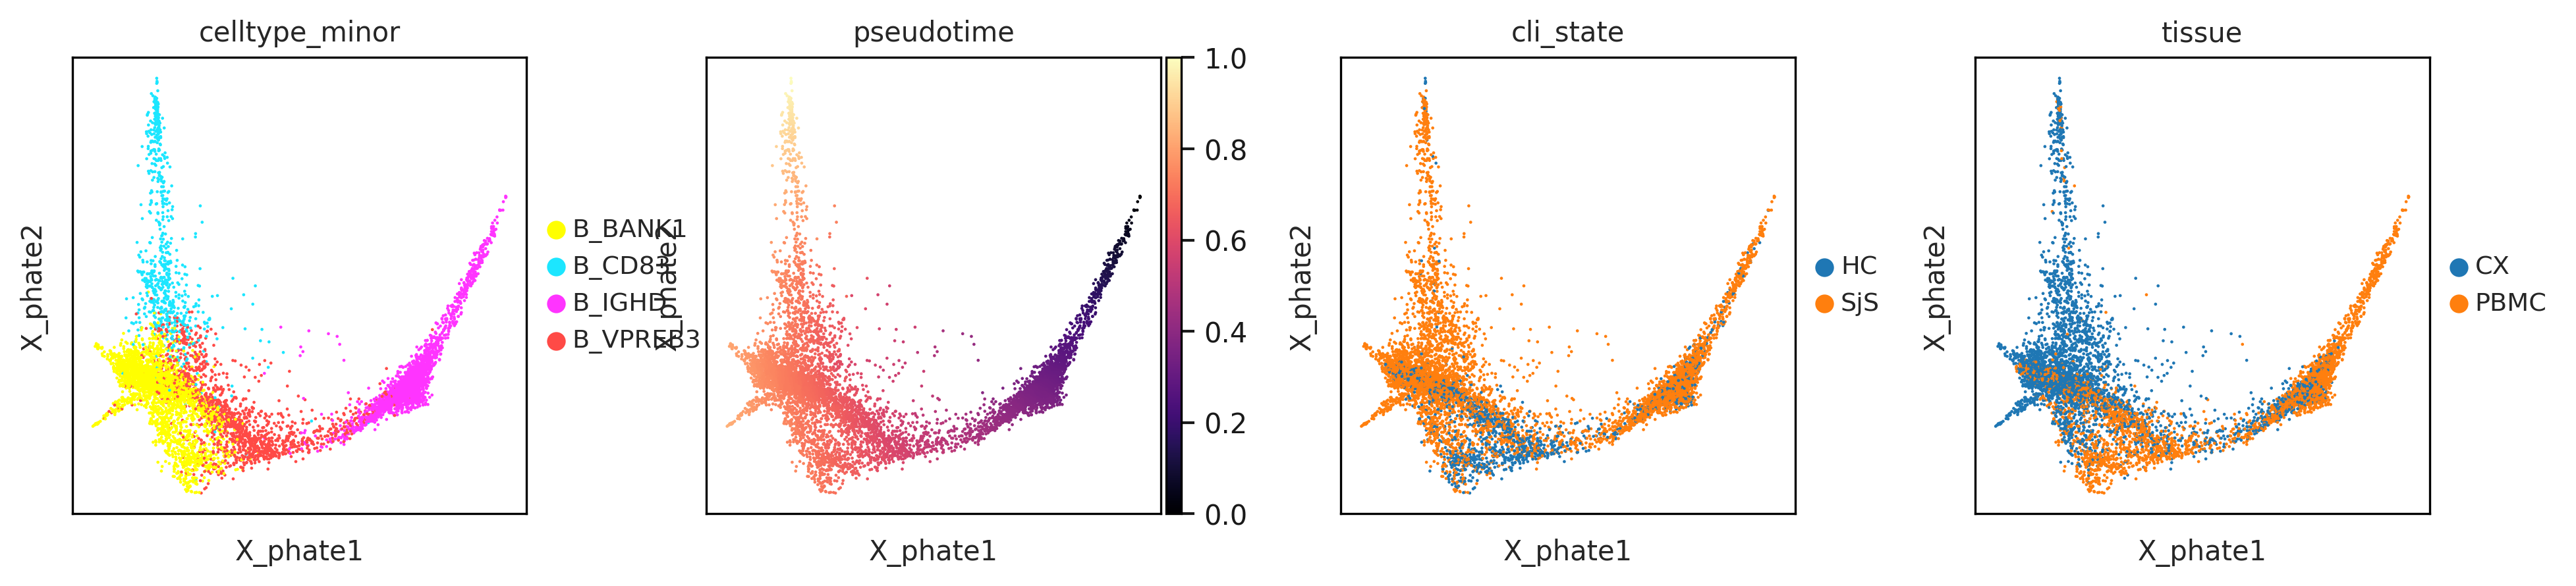

In [25]:
sc.pl.embedding(cx_pbmc_immune_b_raw[np.random.permutation(cx_pbmc_immune_b_raw.obs_names)], 'X_phate',color=['celltype_minor','pseudotime','cli_state','tissue'],cmap='magma',s=5)

In [36]:
sc.pp.highly_variable_genes(cx_pbmc_immune_b_raw,n_top_genes=5000)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [37]:
ad = cx_pbmc_immune_b_raw
genes = cx_pbmc_immune_b_raw.var_names[cx_pbmc_immune_b_raw.var['highly_variable']==True].values
imp_df = pd.DataFrame(ad[:, genes].to_df(), 
                     index=ad.obs_names, columns=genes)

In [38]:
gene_trends = palantir.presults.compute_gene_trends(pr_res_b, imp_df,n_jobs=10)

AACCACAGTCCCAAAT-1_14_1


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falli

Time for processing AACCACAGTCCCAAAT-1_14_1: 30.266392755508424 minutes


In [35]:
gene_clusters

0
FAM87B      8
AL645608.2  5
SAMD11      6
HES4        2
ISG15       0
...        ..
MT-CYB      0
BX004987.1  1
AL354822.1  1
AC240274.1  2
AC233755.2  7

[5000 rows x 1 columns]

In [45]:
trends = gene_trends['AACCACAGTCCCAAAT-1_14_1']['trends']
gene_clusters = palantir.presults.cluster_gene_trends(trends,n_jobs=1,k=150)

Finding 150 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 2.4489059448242188 seconds
Jaccard graph constructed in 28.39346957206726 seconds
Wrote graph to binary file in 0.3729267120361328 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.770693
After 2 runs, maximum modularity is Q = 0.771796
After 9 runs, maximum modularity is Q = 0.773173
Louvain completed 29 runs in 13.654417753219604 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 47.02964973449707 seconds


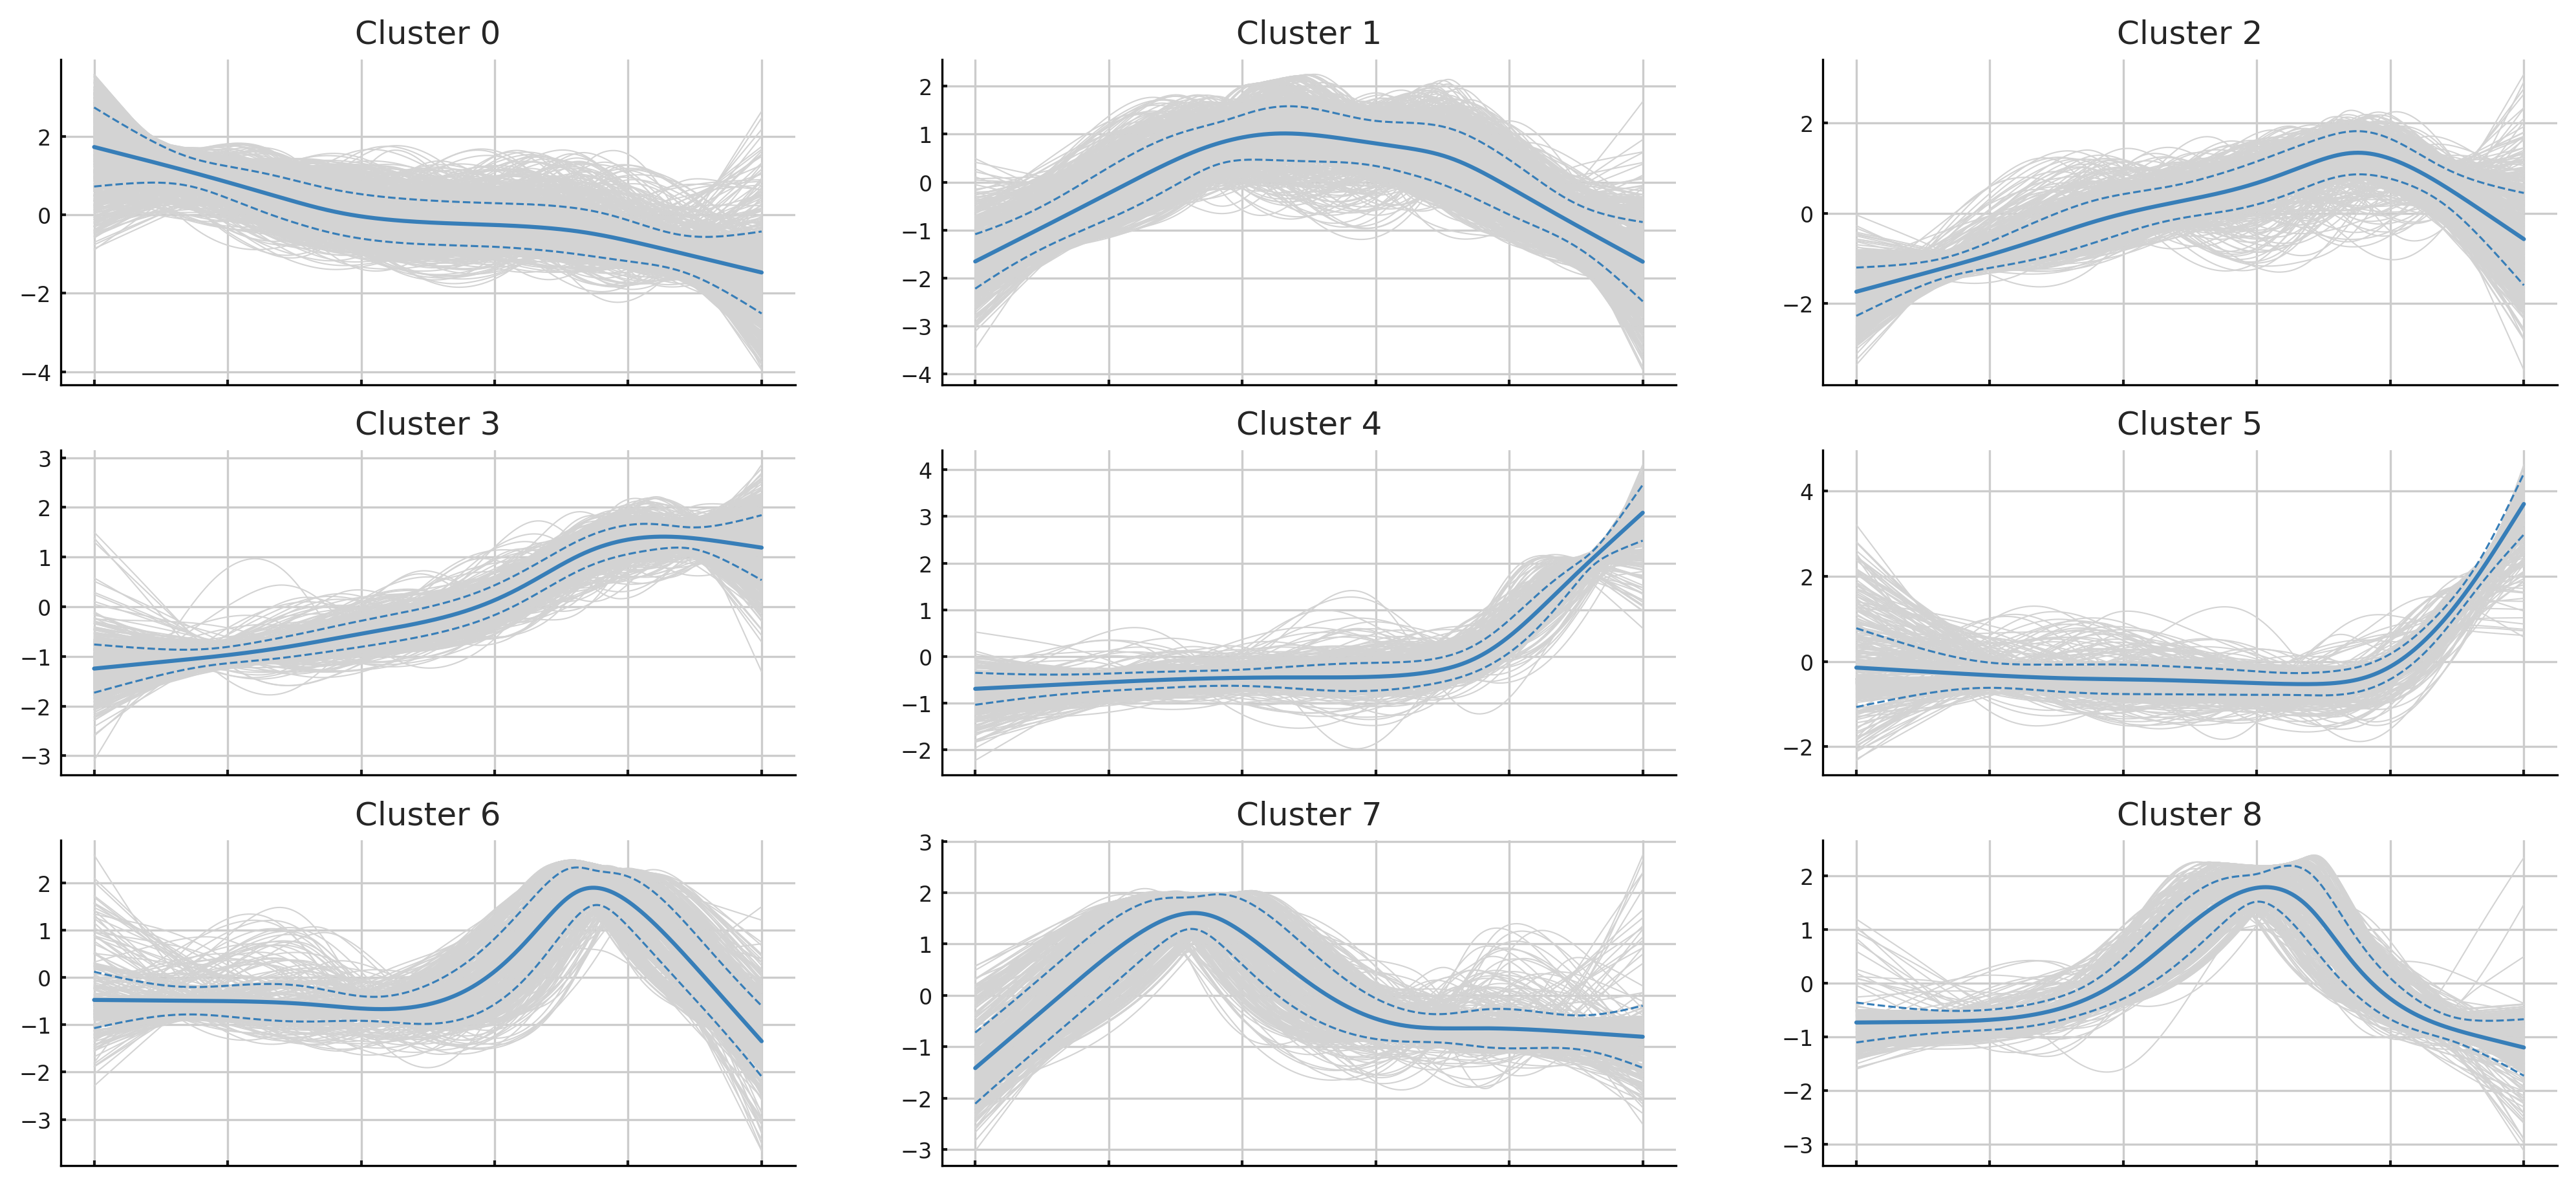

In [78]:
palantir.plot.plot_gene_trend_clusters(trends, gene_clusters)

In [136]:
go_term = pd.read_csv('cx_pbmc_immune_results/B_FINAL_GO.csv')
go_term = go_term[go_term['%InGO'] > 5]
go_term = go_term[(go_term[['_LogP_0', '_LogP_1', '_LogP_2', '_LogP_3','_LogP_4', '_LogP_5', '_LogP_6', '_LogP_7', '_LogP_8']]<-5).sum(1) > 0]

In [137]:
top10_ind = []
for c in range(9):
    top10_ind.extend(go_term.iloc[np.argsort(go_term[f'_LogP_{str(c)}']).values].head(10).index)

In [157]:
go_term_top10_all = go_term.loc[np.unique(top10_ind),[f'_LogP_{str(c)}' for c in range(9)]]
go_term_top10_all.index = go_term.loc[np.unique(top10_ind),'Description']

In [158]:
go_term_top10_all.index = ["".join(i[:1].upper() + i[1:]) for i in go_term_top10_all.index]

/home/qukun/xuhao/miniconda3/envs/palantir/lib/python3.9/site-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


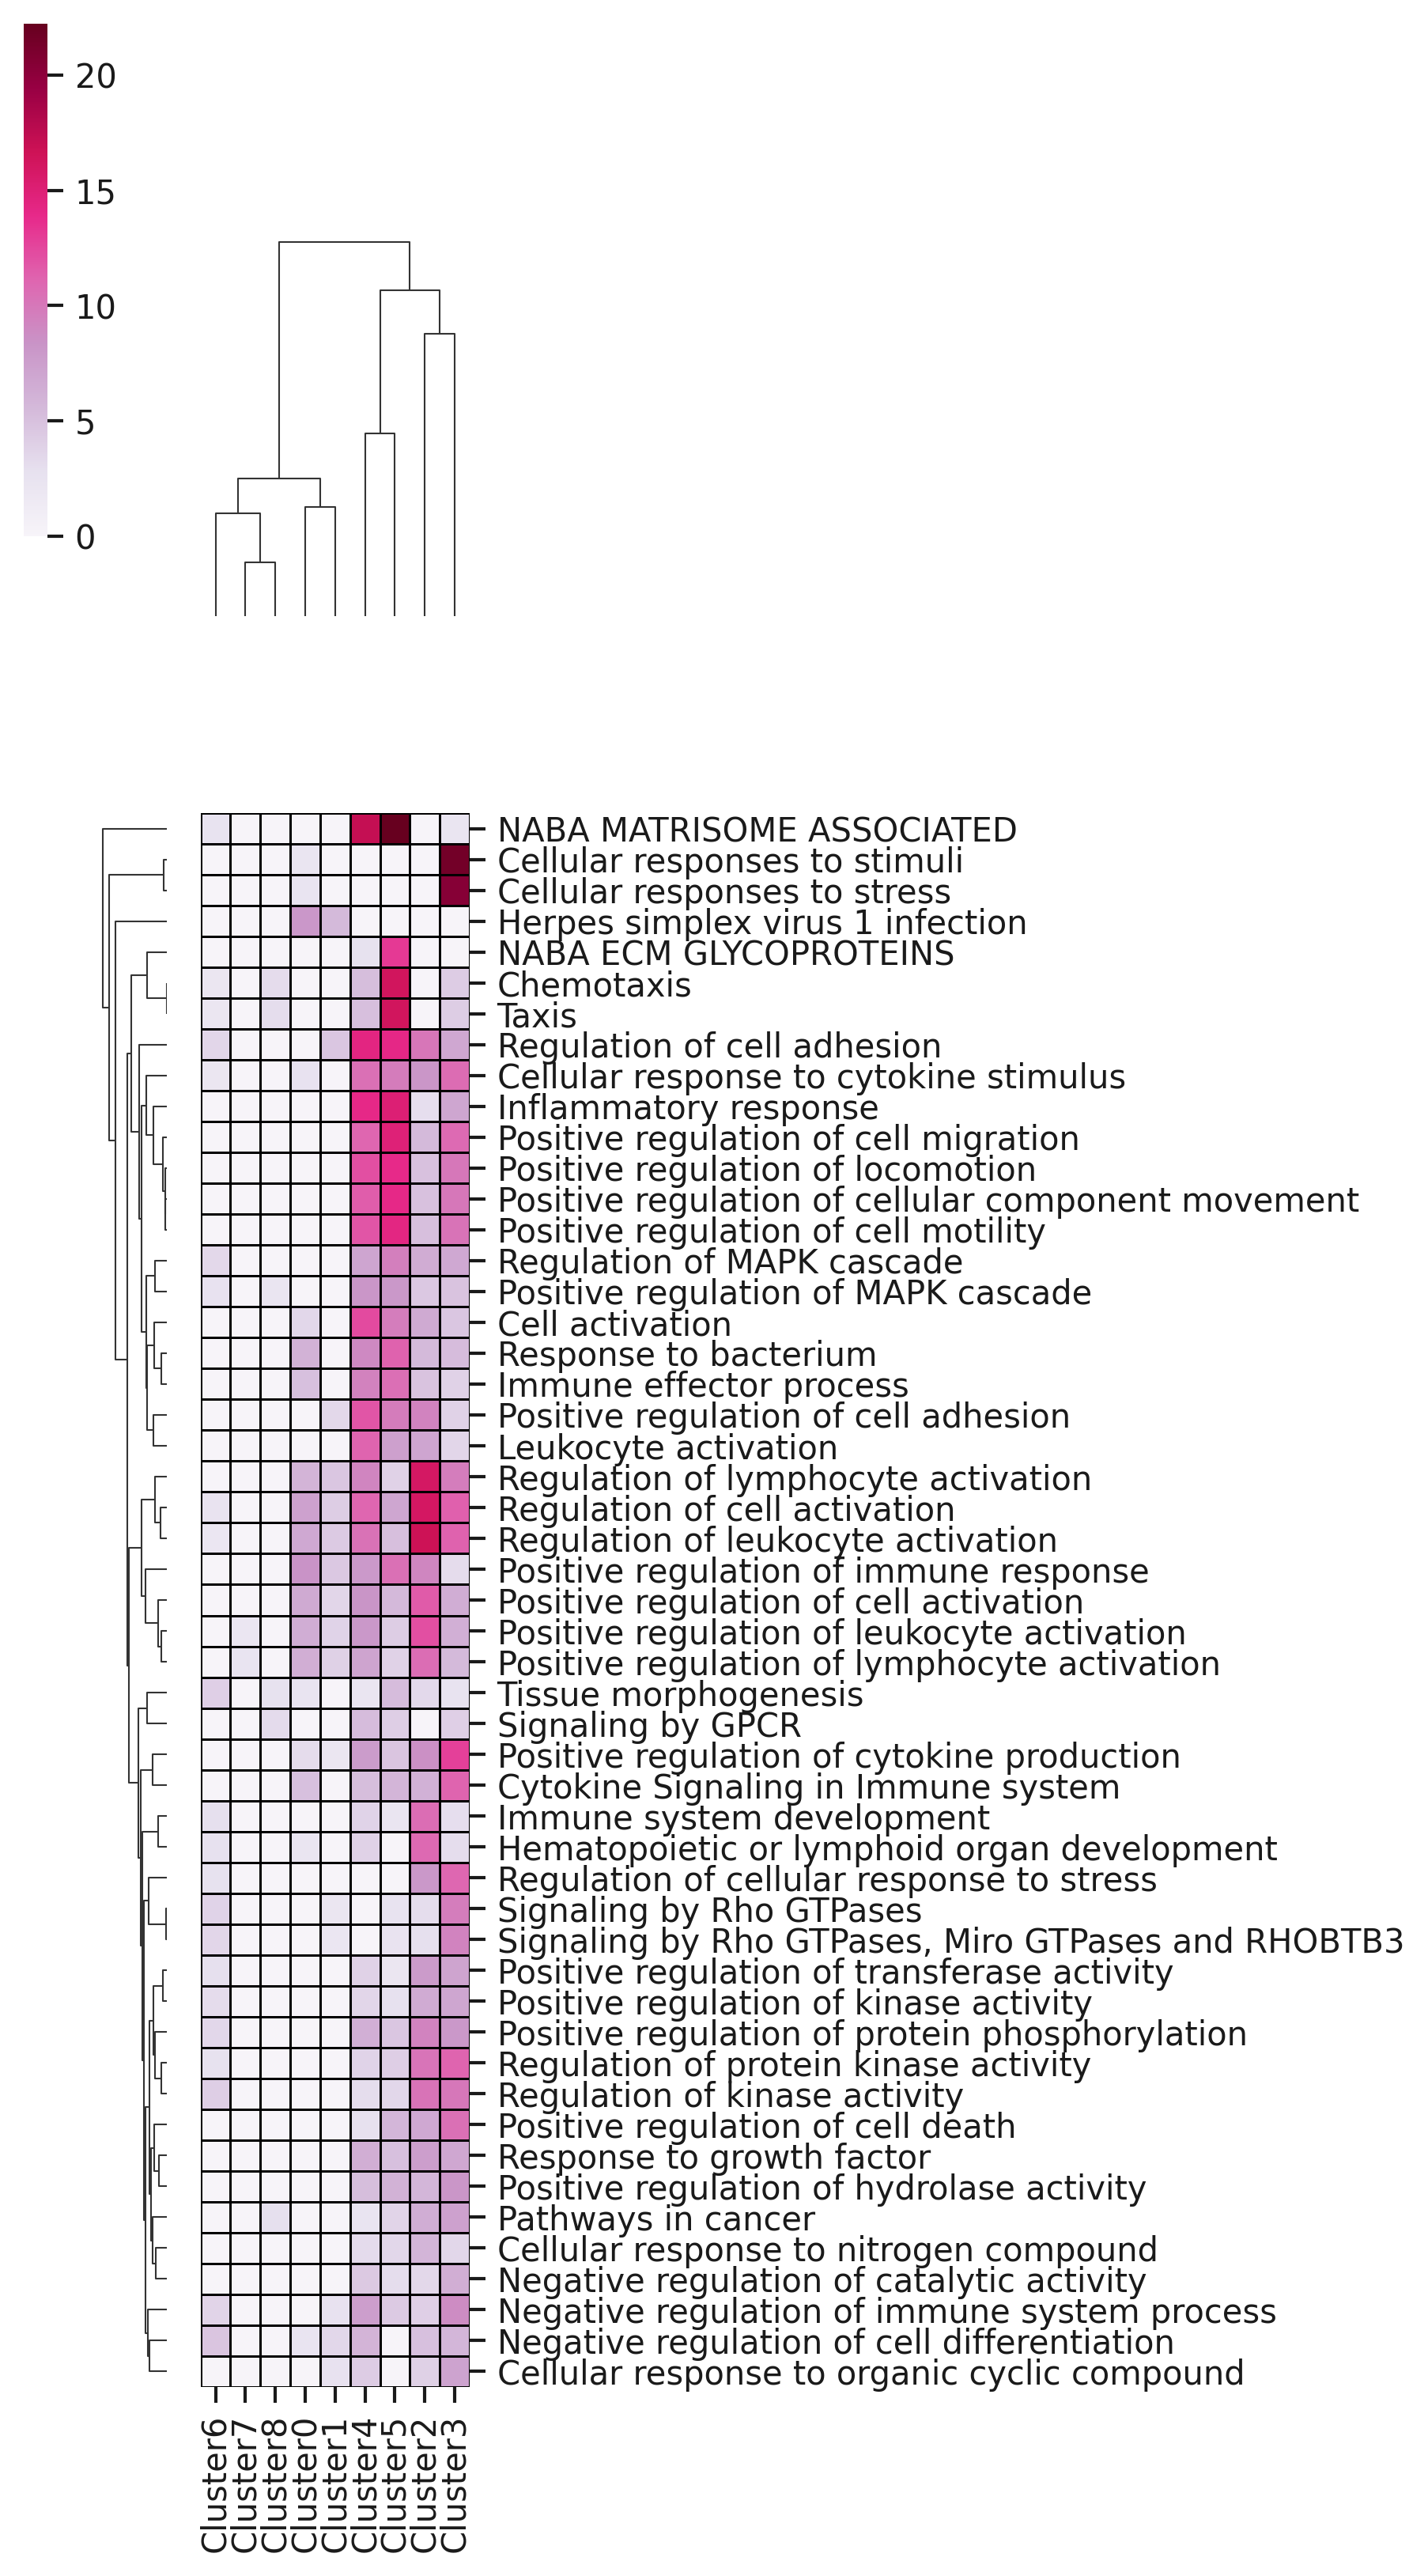

In [160]:
sns.clustermap(-go_term_top10_all,cmap='PuRd',figsize=(2,12),yticklabels=True,xticklabels=[f'Cluster{i}' for i in range(9)],linewidth=.25,linecolor='.0')
plt.savefig('cx_pbmc_immune_results/B_pseudotime_genes_cluster_FINAL_GO_top10_all.pdf',bbox_inches='tight')

8               regulation of leukocyte activation
6                    regulation of cell activation
21             regulation of lymphocyte activation
49     positive regulation of leukocyte activation
40          positive regulation of cell activation
48                 regulation of T cell activation
62     hematopoietic or lymphoid organ development
78    positive regulation of lymphocyte activation
59                       immune system development
61                         IL-18 signaling pathway
Name: Description, dtype: object


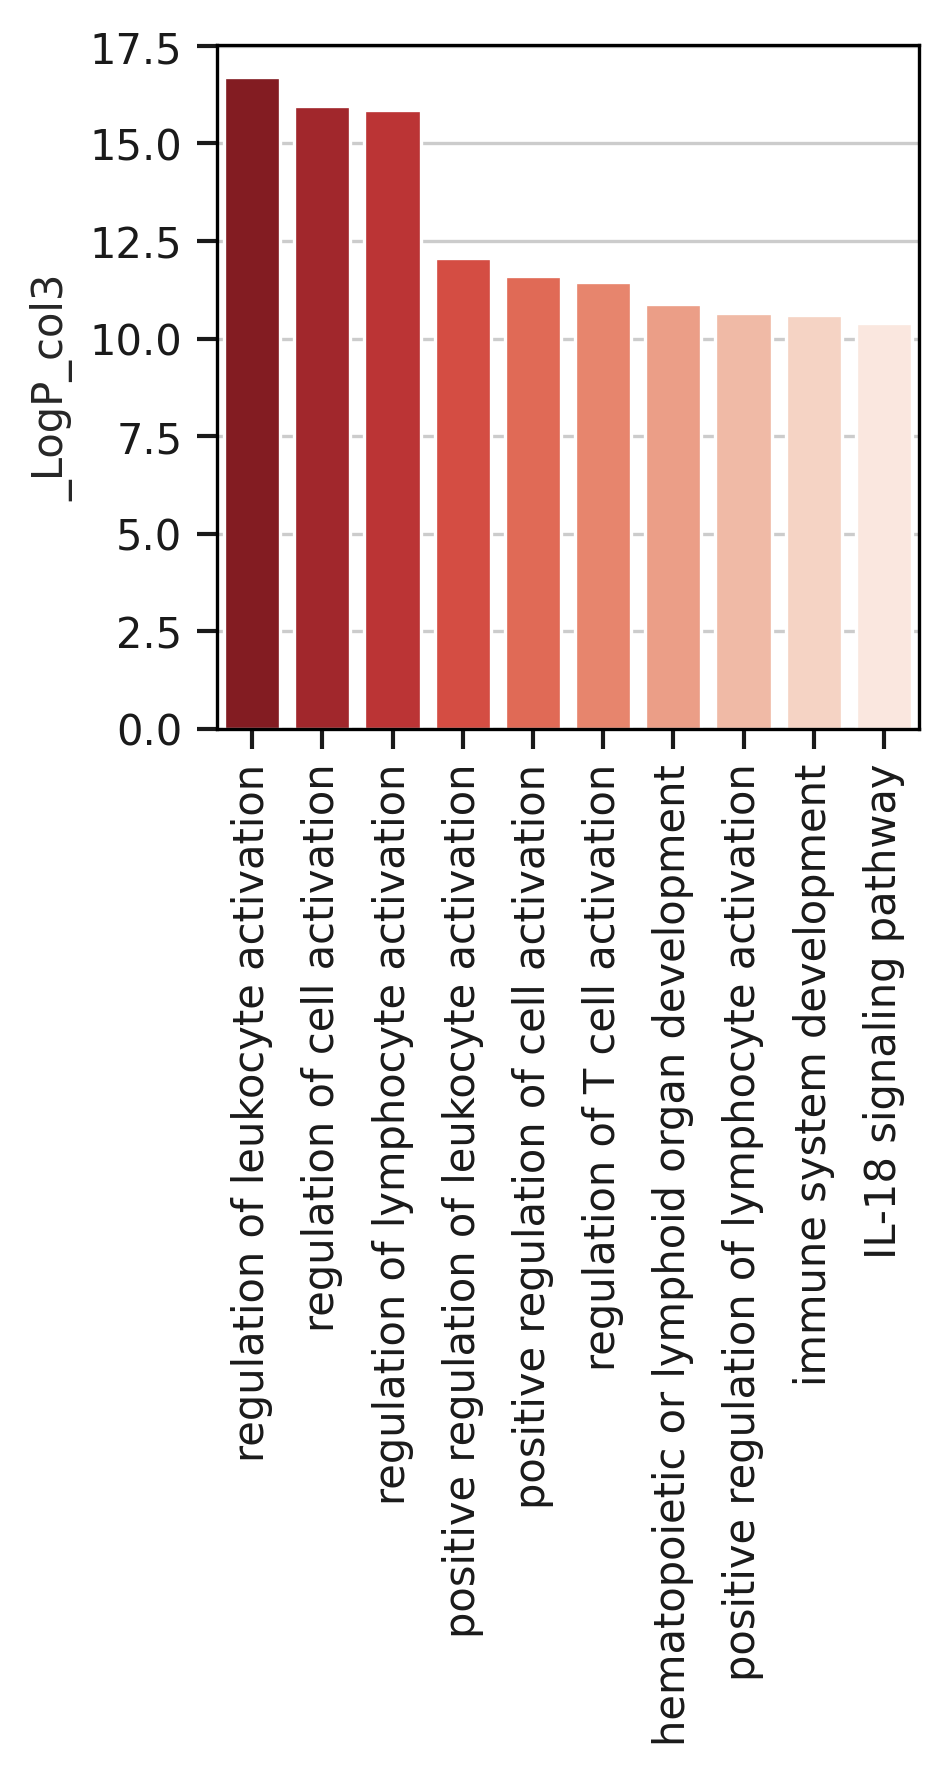

In [111]:
go_term_top10 = go_term.iloc[np.argsort(go_term['_LogP_col3']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_col3'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_b_palantir_pseudotime_gene_cluster_3_GO.pdf',bbox_inches='tight')
plt.show()

92                    Cellular responses to stimuli
98                     Cellular responses to stress
874                    response to unfolded protein
234                         Orexin receptor pathway
1022    response to topologically incorrect protein
481                       Signaling by NTRK1 (TRKA)
73               response to extracellular stimulus
26       positive regulation of cytokine production
459                              Signaling by NTRKs
164          cellular response to external stimulus
Name: Description, dtype: object


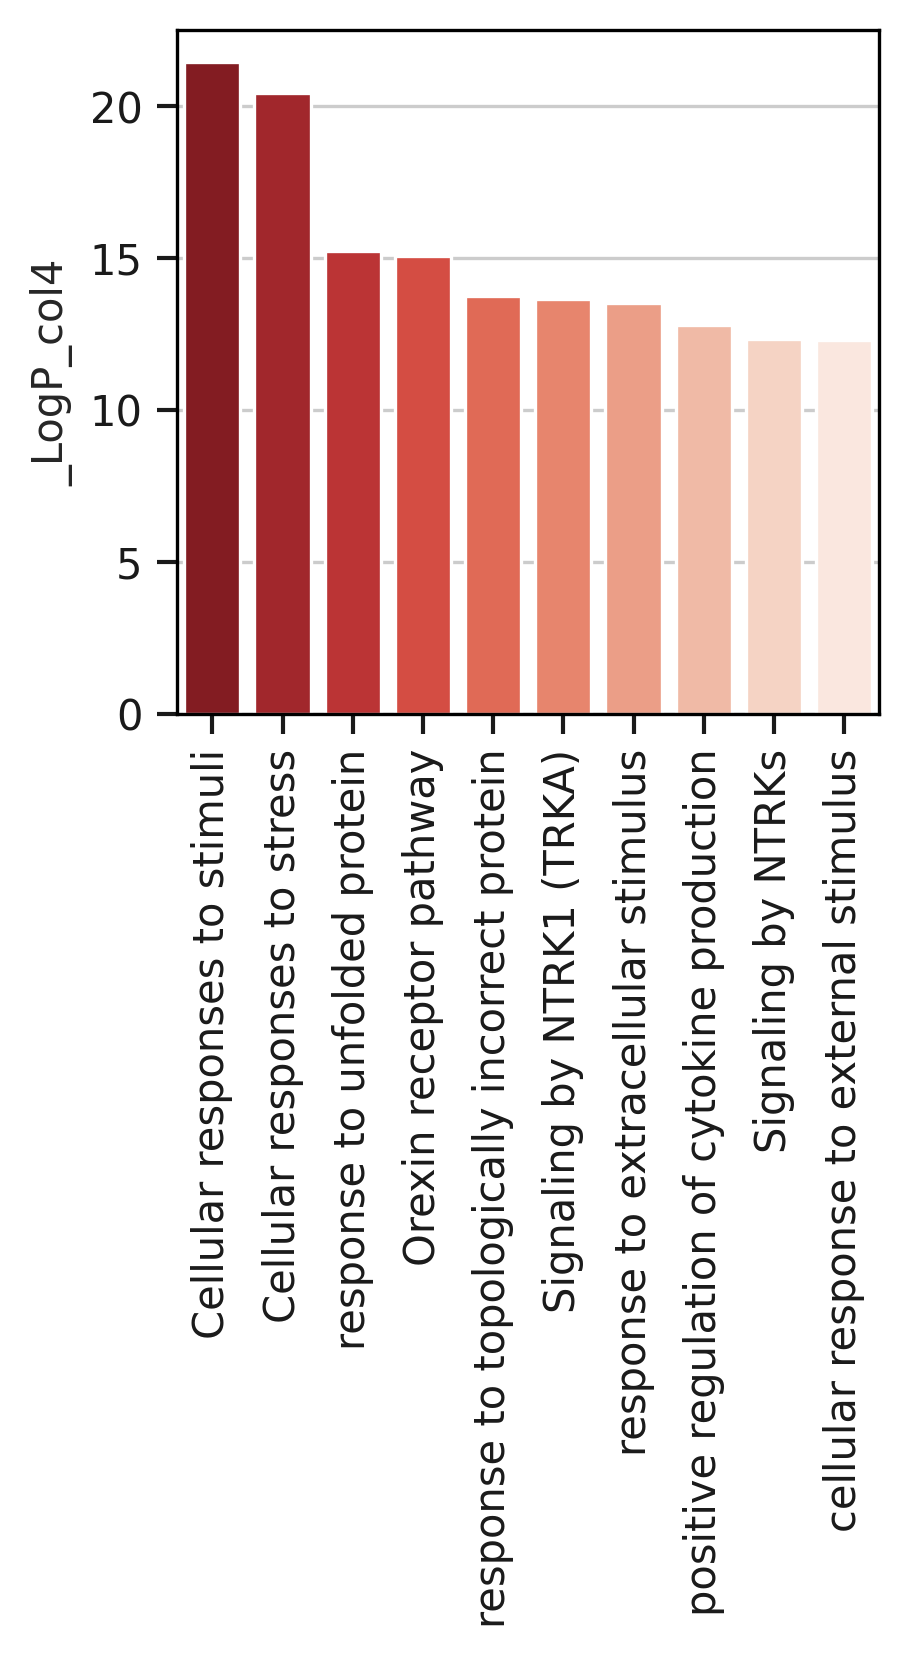

In [110]:
go_term_top10 = go_term.iloc[np.argsort(go_term['_LogP_col4']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_col4'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_b_palantir_pseudotime_gene_cluster_4_GO.pdf',bbox_inches='tight')
plt.show()

71                              NABA MATRISOME ASSOCIATED
0                             regulation of cell adhesion
9                                   inflammatory response
29                                        cell activation
69      positive regulation of response to external st...
4                       positive regulation of locomotion
1113    Immunoregulatory interactions between a Lympho...
14                   positive regulation of cell adhesion
5                    positive regulation of cell motility
3       positive regulation of cellular component move...
Name: Description, dtype: object


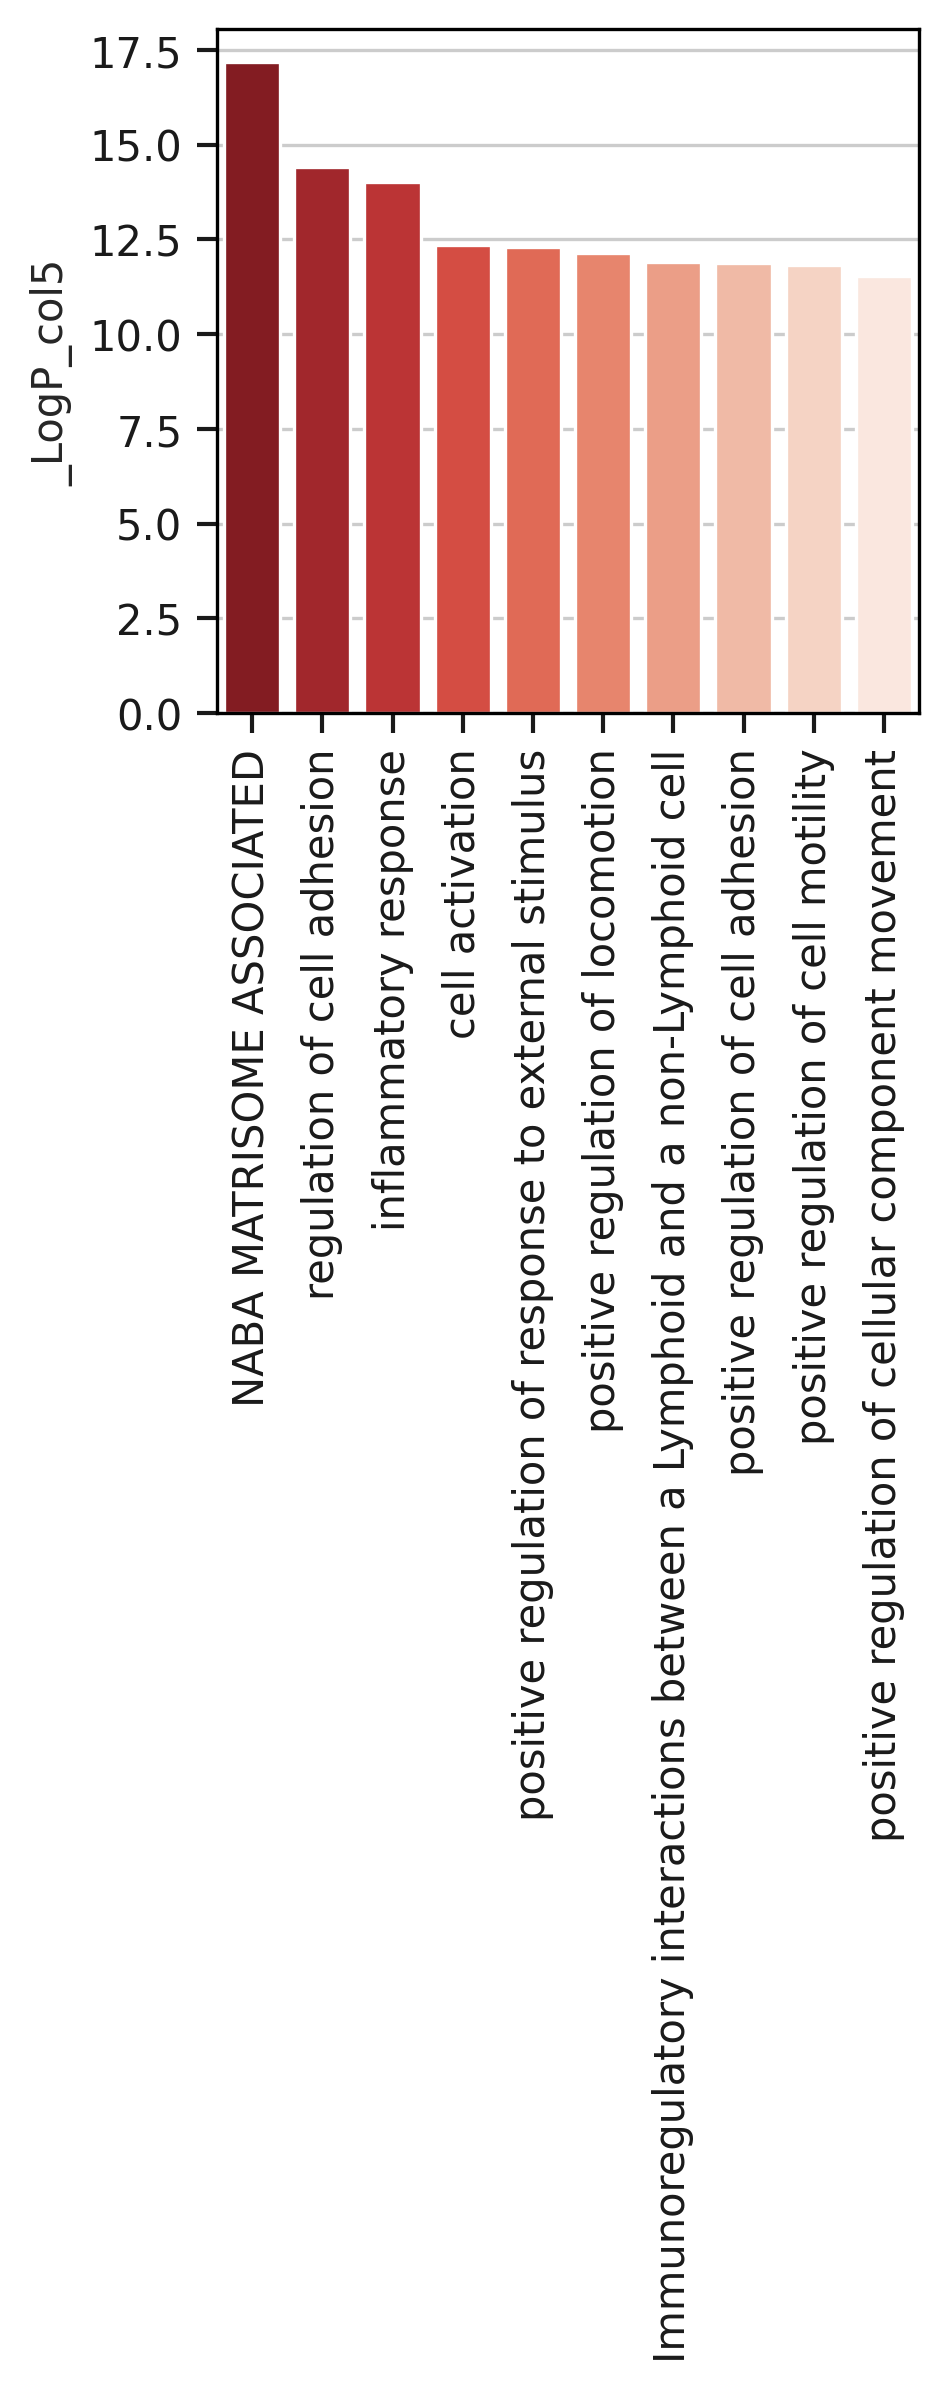

In [109]:
go_term_top10 = go_term.iloc[np.argsort(go_term['_LogP_col5']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_col5'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_b_palantir_pseudotime_gene_cluster_5_GO.pdf',bbox_inches='tight')
plt.show()

71                         NABA MATRISOME ASSOCIATED
320                extracellular matrix organization
326             extracellular structure organization
334    external encapsulating structure organization
634                              NABA CORE MATRISOME
76                                        chemotaxis
77                                             taxis
139                Extracellular matrix organization
9                              inflammatory response
2              positive regulation of cell migration
Name: Description, dtype: object


findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


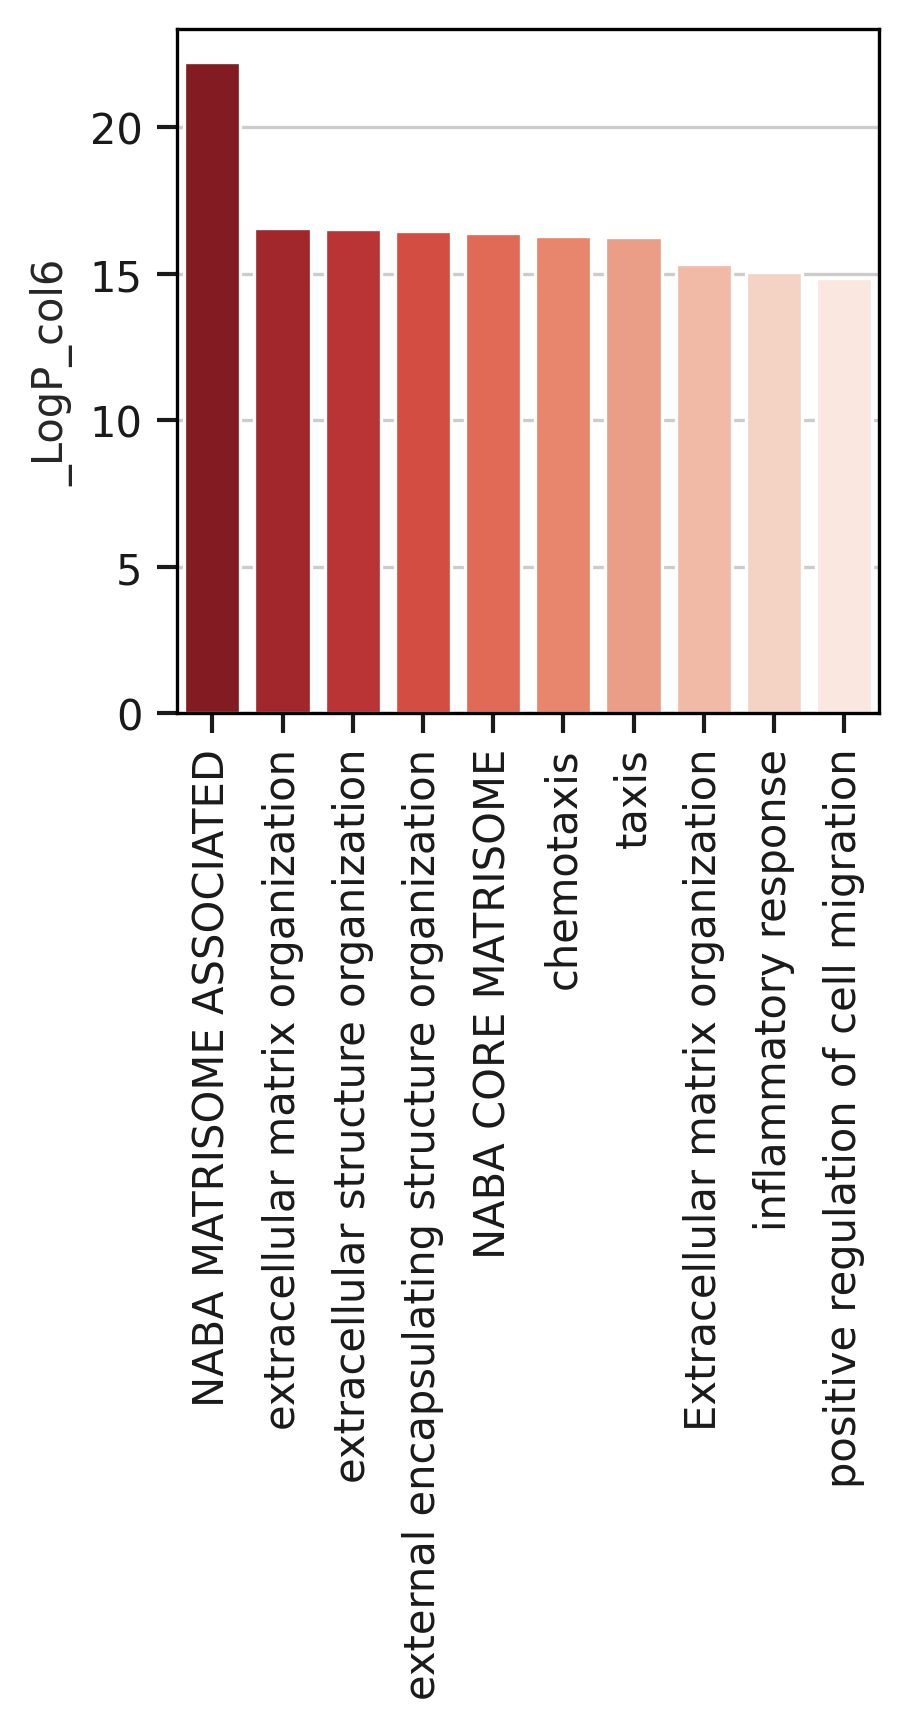

In [7]:
go_term_top10 = go_term.iloc[np.argsort(go_term['_LogP_col6']).values].head(10)
print(go_term_top10['Description'])
sns.barplot(y=-go_term_top10['_LogP_col6'],x=np.arange(10),palette='Reds_r')
plt.xticks(np.arange(10),go_term_top10['Description'],rotation=90)
plt.savefig('cx_pbmc_immune_results/barplot_cx_pbmc_b_palantir_pseudotime_gene_cluster_6_GO.pdf',bbox_inches='tight')
plt.show()